## Steps Involved

###  1. Data cleaning and visualizaing the data
###  2. Rescaling the data and adding dummy values and splitting the data
###  3. Training the model
###  4. Plotting Residual plot and analysing the data
###  5. Evaluating the model and predecting the test data values




In [2]:
# importing required libraries

# df cleaning and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# rescaling, splitting the data,  model training, building model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [3]:
# importing the dfset

df_1 = pd.read_csv('day.csv')
df_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking for shape of the df
df_1['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [5]:
# checking for type of feature
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# checking for null values

df_1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# describing the df

df_1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# converting the dteday to date format

df_1['dteday'] = pd.to_datetime(df_1['dteday'], format= "mixed")


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
df_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# df_1['month'] = pd.DatetimeIndex(df['dteday']).month

In [13]:
df_1.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,2019-12-31,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [14]:
# df_1.loc[500, 'month']

In [15]:
# visualizing the data

<Axes: xlabel='yr', ylabel='cnt'>

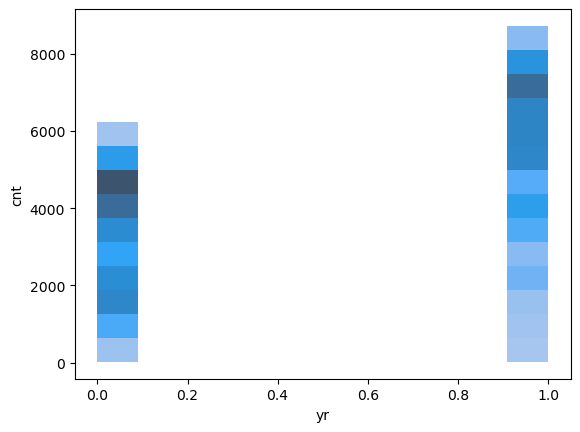

In [16]:
# 2019 year had more number of rental counts

sns.histplot(x='yr', y='cnt', data=df_1)

<Axes: xlabel='mnth', ylabel='cnt'>

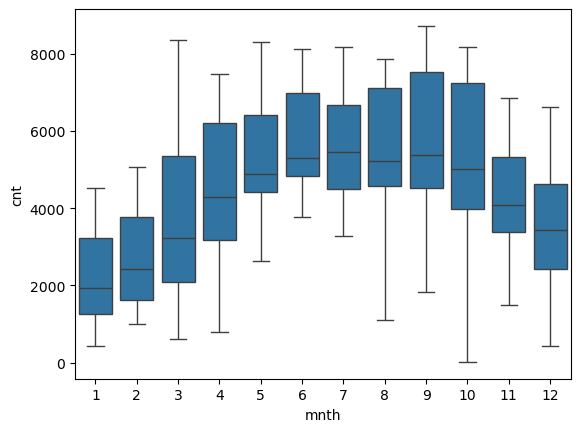

In [17]:
# september month has a huge spike as its spring season people tends to go out and rainy season has less spike

sns.boxplot(x='mnth', y='cnt', data=df_1)

<Axes: xlabel='weekday', ylabel='cnt'>

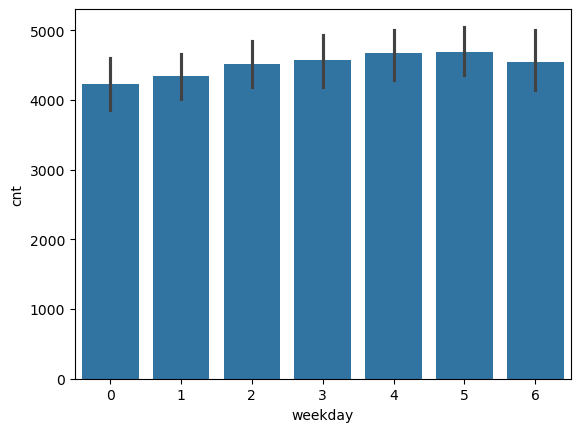

In [18]:
# people uses rental bikes more on weekdays rather than weekends

sns.barplot(x='weekday', y='cnt', data=df_1)

<Axes: xlabel='workingday', ylabel='cnt'>

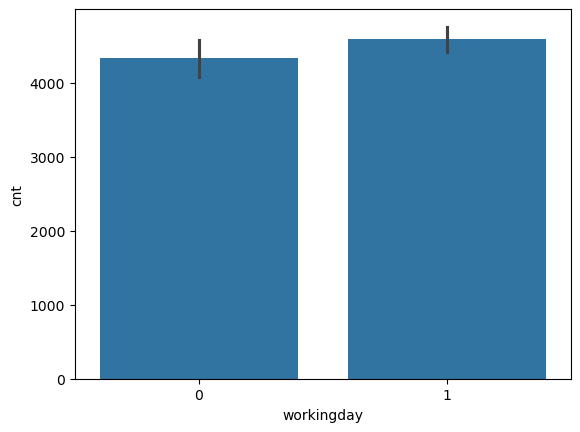

In [19]:
# workingday vs count
# people used rental bikes more on working day

sns.barplot(x='workingday', y='cnt', data = df_1)

In [20]:
df_1['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

<Axes: xlabel='holiday', ylabel='cnt'>

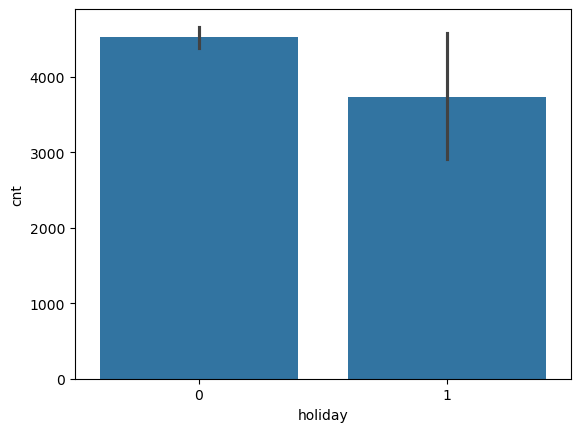

In [21]:
sns.barplot(x = 'holiday', y='cnt', data=df_1)

<Axes: xlabel='weathersit', ylabel='cnt'>

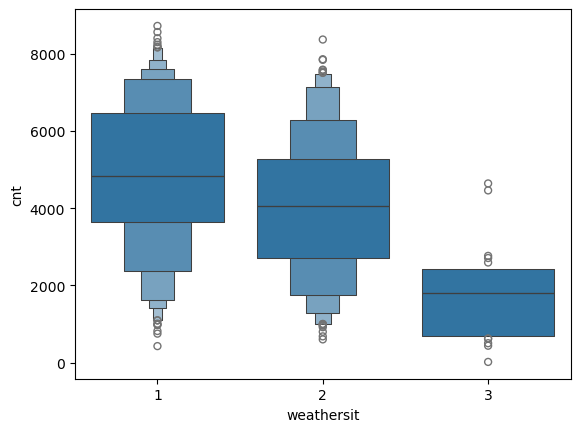

In [22]:
# people uses rental bikes more in the  Clear, Few clouds, Partly cloudy, Partly cloudy time 
# and less in Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

sns.boxenplot(x='weathersit', y='cnt', data=df_1)

<Axes: xlabel='season', ylabel='cnt'>

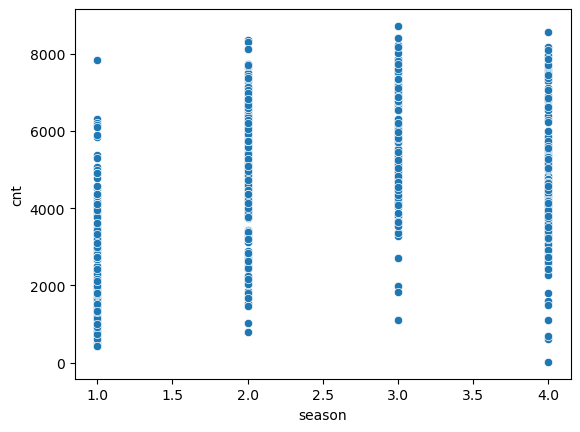

In [23]:
sns.scatterplot(x='season', y='cnt', data=df_1)

In [24]:
df_1['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [25]:
df_1['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

<Axes: xlabel='temp', ylabel='cnt'>

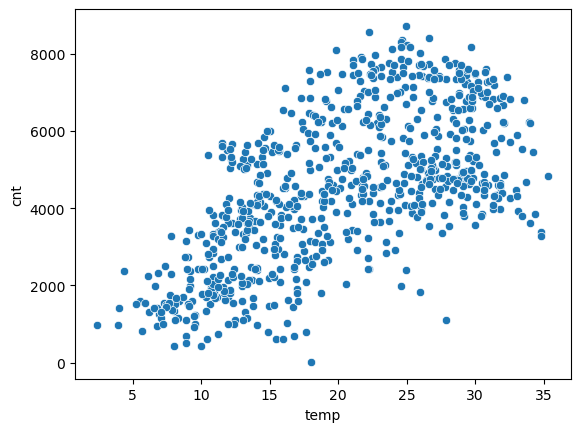

In [26]:
# temp vs count

sns.scatterplot(x='temp', y = 'cnt', data= df_1)

<Axes: xlabel='atemp', ylabel='cnt'>

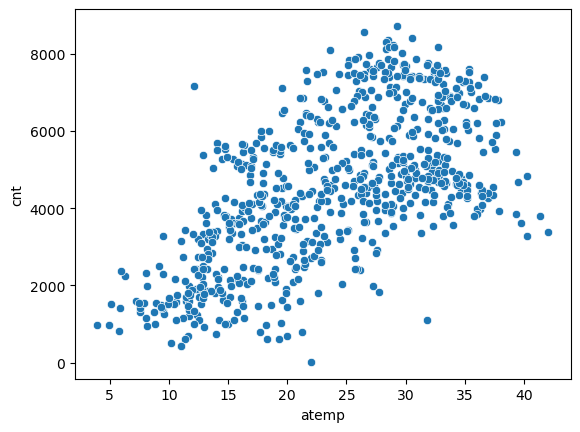

In [27]:
sns.scatterplot(x='atemp', y = 'cnt', data= df_1)

<Axes: xlabel='windspeed', ylabel='cnt'>

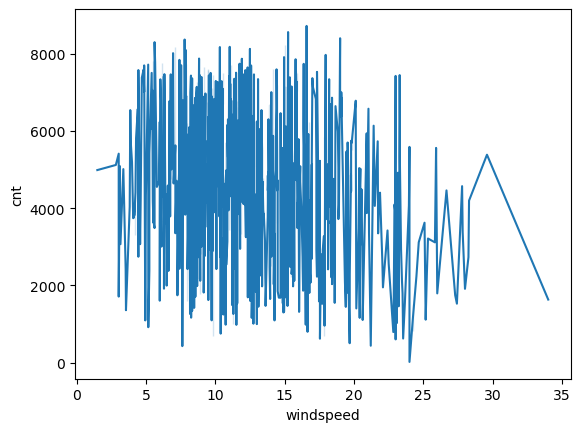

In [28]:
sns.lineplot(x='windspeed', y = 'cnt', data= df_1)

<Axes: xlabel='hum', ylabel='cnt'>

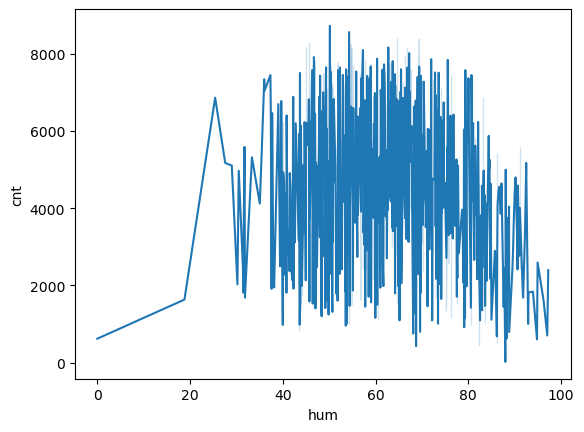

In [29]:
sns.lineplot(x='hum', y='cnt', data=df_1)

In [30]:
# df.head()

In [31]:
def weekend(day):
    if (day == 0) or (day == 6):
        return 1
    else:
        return 0

df_1['weekend'] = df_1['weekday'].apply(weekend)

In [32]:
df_1['weekend'].value_counts()

weekend
0    520
1    210
Name: count, dtype: int64

In [33]:
df_1.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,1
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,1
729,730,2019-12-31,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729,0


In [34]:
df_1['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [321]:
df_1 = df_1.drop('instant', axis=1)

KeyError: "['instant'] not found in axis"

In [ ]:
df_1 = df_1.drop('dteday', axis=1)

In [37]:
df_1 = df_1.drop('temp', axis=1)

In [38]:
df_1 = df_1.drop('weekday', axis=1)

In [324]:
df_1.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,weekend
0,1,0,1,0,0,2,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,120,1229,1349,0
3,1,0,1,0,1,1,10.60610,59.0435,10.739832,108,1454,1562,0
4,1,0,1,0,1,1,11.46350,43.6957,12.522300,82,1518,1600,0


<Axes: >

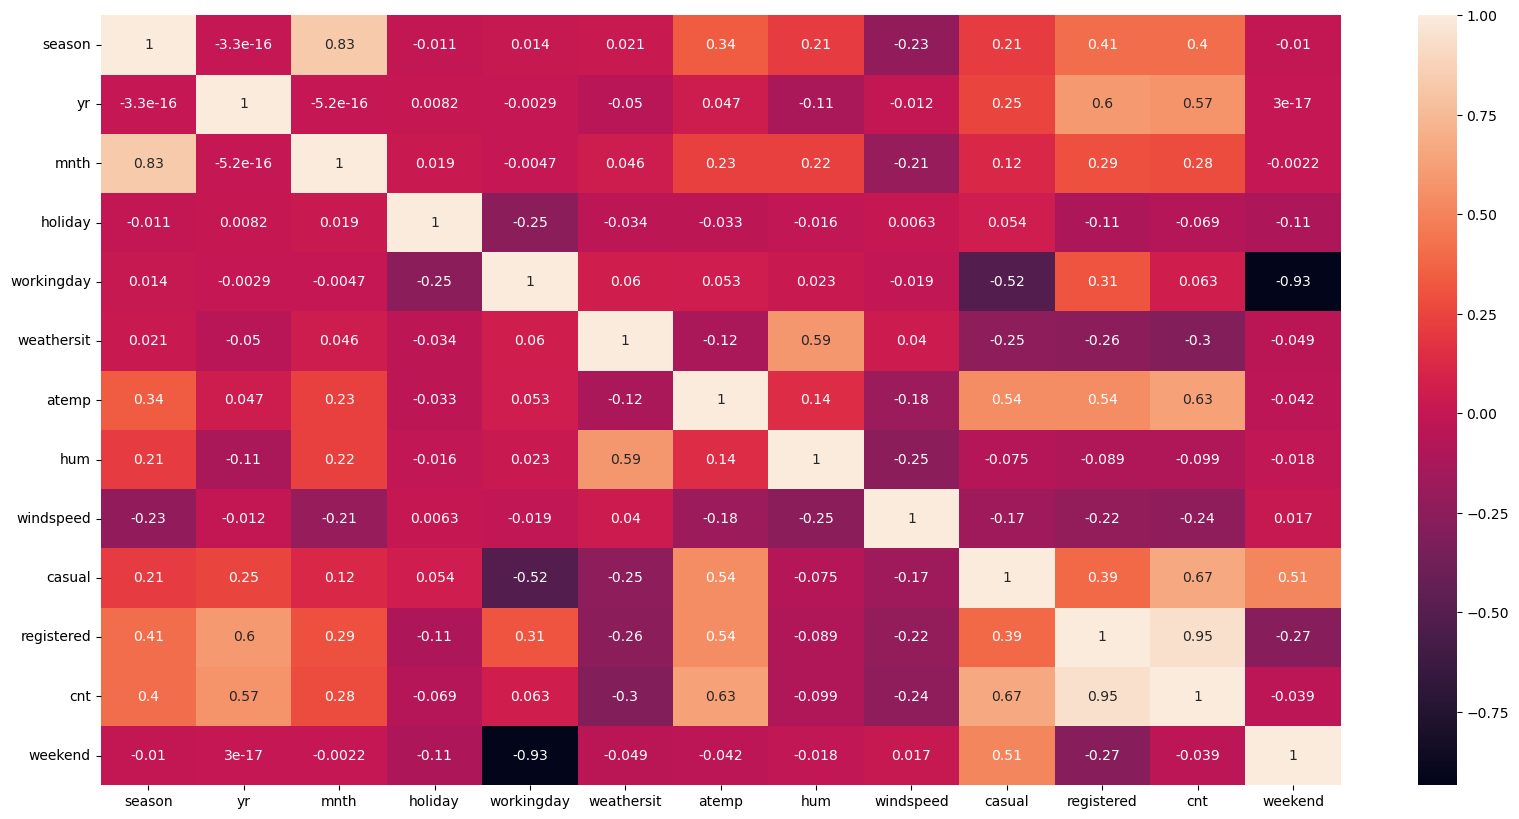

In [326]:
# now seeing how all the variables are correleated
plt.figure(figsize=(20,10))
sns.heatmap(df_1.corr(), annot=True)

In [328]:
df_1.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,weekend
0,1,0,1,0,0,2,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,120,1229,1349,0
3,1,0,1,0,1,1,10.60610,59.0435,10.739832,108,1454,1562,0
4,1,0,1,0,1,1,11.46350,43.6957,12.522300,82,1518,1600,0


In [330]:
# creating dummy variable

b = pd.get_dummies(df_1['season'], dtype=int, drop_first=True)

In [360]:
b

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [44]:
b.iloc[600, 2]

0

In [332]:
c = pd.get_dummies(df_1['weathersit'], dtype=int, drop_first=True)

In [362]:
c

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [364]:
df_6 = df_1.join(b)

In [374]:
df_6.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,weekend,summer,rainf,winter
0,1,0,1,0,0,2,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0
3,1,0,1,0,1,1,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0
4,1,0,1,0,1,1,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0


In [376]:
df_7 = df_6.join(c)

In [378]:
df_7

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,weekend,summer,rainf,winter,2,3
0,1,0,1,0,0,2,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,0
3,1,0,1,0,1,1,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0
4,1,0,1,0,1,1,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,1,2,11.33210,65.2917,23.458911,247,1867,2114,0,0,0,0,1,0
726,1,1,12,0,1,2,12.75230,59.0000,10.416557,644,2451,3095,0,0,0,0,1,0
727,1,1,12,0,0,2,12.12000,75.2917,8.333661,159,1182,1341,1,0,0,0,1,0
728,1,1,12,0,0,1,11.58500,48.3333,23.500518,364,1432,1796,1,0,0,0,0,0


In [406]:
df_8 = df_7.rename(columns = {2: "Mist"})
df_8 = df_7.rename(columns = {3: "snow"})

In [408]:
df_8.columns

Index([    'season',         'yr',       'mnth',    'holiday', 'workingday',
       'weathersit',      'atemp',        'hum',  'windspeed',     'casual',
       'registered',        'cnt',    'weekend',     'summer',      'rainf',
           'winter',            2,       'snow'],
      dtype='object')

In [404]:
df_8.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,weekend,summer,rainf,winter,2,snow
0,1,0,1,0,0,2,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,0
3,1,0,1,0,1,1,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0
4,1,0,1,0,1,1,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0


In [370]:
df_6 = df_6.rename(columns={2:'summer'})

In [372]:
df_6 = df_6.rename(columns={3:'rainf'})
df_6 = df_6.rename(columns={4:'winter'})

In [412]:
df_8 = df_8.rename(columns={2: 'Mist'})

In [416]:
df_8 = df_8.drop('season', axis=1)

In [418]:
df_8.head()

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,weekend,summer,rainf,winter,Mist,snow
0,0,1,0,0,2,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0
1,0,1,0,0,2,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0
2,0,1,0,1,1,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,0
3,0,1,0,1,1,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0
4,0,1,0,1,1,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0


In [420]:
df_8 = df_8.drop('weathersit', axis=1)

In [422]:
df_8.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,weekend,summer,rainf,winter,Mist,snow
0,0,1,0,0,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0
1,0,1,0,0,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0
2,0,1,0,1,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,0
3,0,1,0,1,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0
4,0,1,0,1,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0


In [103]:
# c = pd.get_dummies(df3['weathersit'], dtype=int, drop_first=True])

In [ ]:
# df2 = df3.join(c)

In [ ]:
# df2 = df2.rename(columns={2:"Mist"})
# df2 = df2.rename(columns={3:"snow"})

In [ ]:
# df2.drop(['Mist', 'snow'], axis=1)

In [425]:
df_8 = df_8.drop(['casual', 'registered'], axis=1)

In [427]:
df_8.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,weekend,summer,rainf,winter,Mist,snow
0,0,1,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0
1,0,1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1,0
2,0,1,0,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0
3,0,1,0,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0
4,0,1,0,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0


In [429]:
# splitting the data for test and train

df_train2, df_test2 = train_test_split(df_8, train_size = 0.7, random_state = 100)

In [431]:
df_train2


,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,weekend,summer,rainf,winter,Mist,snow
576,1,7,0,1,33.14480,70.4167,11.083475,7216,0,0,1,0,0,0
426,1,3,0,0,20.67460,62.1250,10.792293,4066,1,0,0,0,1,0
728,1,12,0,0,11.58500,48.3333,23.500518,1796,1,0,0,0,0,0
482,1,4,0,0,18.87520,48.9583,8.708325,4220,1,1,0,0,1,0
111,0,4,0,1,16.09770,72.9583,14.707907,1683,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,8,0,1,35.35440,65.9583,8.666718,7261,0,0,1,0,0,0
53,0,2,0,1,12.28585,42.3043,6.305571,1917,0,0,0,0,0,0
350,0,12,0,0,12.46855,56.0833,16.292189,2739,1,0,0,1,1,0
79,0,3,0,1,20.48675,73.7391,19.348461,2077,0,1,0,0,1,0


In [433]:
df_train2.shape

(510, 14)

In [435]:
df_test2.shape

(220, 14)

In [437]:
df_train2

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,weekend,summer,rainf,winter,Mist,snow
576,1,7,0,1,33.14480,70.4167,11.083475,7216,0,0,1,0,0,0
426,1,3,0,0,20.67460,62.1250,10.792293,4066,1,0,0,0,1,0
728,1,12,0,0,11.58500,48.3333,23.500518,1796,1,0,0,0,0,0
482,1,4,0,0,18.87520,48.9583,8.708325,4220,1,1,0,0,1,0
111,0,4,0,1,16.09770,72.9583,14.707907,1683,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,8,0,1,35.35440,65.9583,8.666718,7261,0,0,1,0,0,0
53,0,2,0,1,12.28585,42.3043,6.305571,1917,0,0,0,0,0,0
350,0,12,0,0,12.46855,56.0833,16.292189,2739,1,0,0,1,1,0
79,0,3,0,1,20.48675,73.7391,19.348461,2077,0,1,0,0,1,0


In [439]:
df_train2.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'cnt', 'weekend', 'summer', 'rainf', 'winter', 'Mist', 'snow'],
      dtype='object')

In [227]:
# df_train1 = df_train1.drop('month', axis=1)

In [229]:
# df_train1 =  df_train1.drop('yr', axis=1)

In [443]:
# Rescaling the features

# applying normilization technique
scaler = MinMaxScaler()

min_mize = ['mnth', 'atemp', 'hum', 'windspeed', 'cnt' ]

df_train2[min_mize] = scaler.fit_transform(df_train2[min_mize])

df_train2.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,weekend,summer,rainf,winter,Mist,snow
576,1,0.545455,0,1,0.766351,0.725633,0.264686,0.827658,0,0,1,0,0,0
426,1,0.181818,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0
728,1,1.000000,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0
482,1,0.272727,0,0,0.391735,0.504508,0.188475,0.482973,1,1,0,0,1,0
111,0,0.272727,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0


In [447]:
df_train2.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,weekend,summer,rainf,winter,Mist,snow
576,1,0.545455,0,1,0.766351,0.725633,0.264686,0.827658,0,0,1,0,0,0
426,1,0.181818,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0
728,1,1.000000,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0
482,1,0.272727,0,0,0.391735,0.504508,0.188475,0.482973,1,1,0,0,1,0
111,0,0.272727,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0


In [450]:
df_train2.shape

(510, 14)

<Axes: >

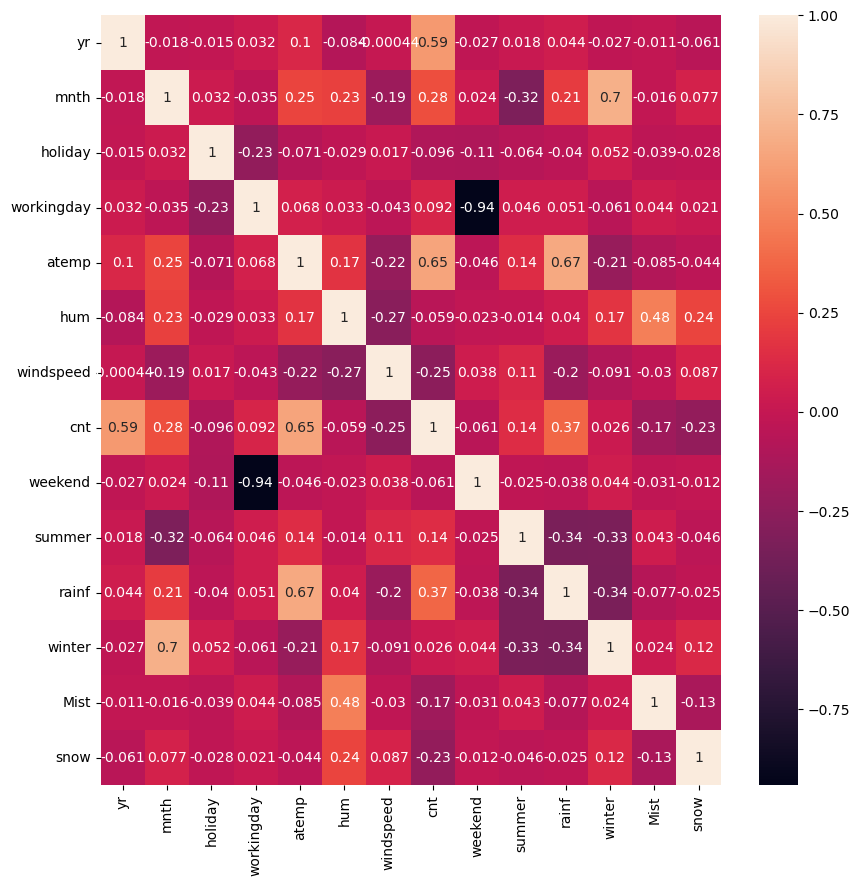

In [452]:
# visualizing the train data now to find if thier is any releation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(df_train2.corr(), annot=True)

In [454]:
y_train1 = df_train2.pop('cnt')
X_train1= df_train2

In [456]:
X_train1.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'weekend', 'summer', 'rainf', 'winter', 'Mist', 'snow'],
      dtype='object')

In [458]:
y_train1

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [460]:
# First model

# adding constant for X_train

x_train_sm = sm.add_constant(X_train1)
x_train_sm

lm = sm.OLS(y_train, x_train_sm)
lm_1 = lm.fit()

lm_1.params

lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          4.85e-179
Time:                        00:17:26   Log-Likelihood:                -4143.1
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     497   BIC:                             8367.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1219.6978    192.103      6.349      0.000     842.263    1597.133
yr          2016.1843     74.429     27.089      0.000    1869.951    2162.418
mnth         185.6389    229.145      0.810      0.418    -264.574     635.852
holiday      -61.0972    184.065     -0.332      0.740    -422.738     300.544
workingday   717.8387     92.520      7.759      0.000     536.059     899.618
atemp       4268.6114    310.700     13.739      0.000    3658.163    4879.060
hum        -1230.1864    345.017     -3.566      0.000   -1908.059    -552.314
windspeed  -1417.3980    236.160     -6.002      0.000   -1881.392    -953.404
weekend      562.9563     98.734      5.702      0.000     368.968     756.944
summer      1057.3233    137.529      7.688      0.000     787.114    1327.533
rainf        763.7995    197.349      3.870      0.000     376.058    1151.541
winter      1293.7272    196.785      6.574      0.000     907.093    1680.361
Mist        -463.9339     96.302     -4.817      0.000    -653.144    -274.724
snow       -2055.8637    242.260     -8.486      0.000   -2531.843   -1579.885
==============================================================================
Omnibus:                       61.331   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.356
Skew:                          -0.572   Prob(JB):                     5.07e-39
Kurtosis:                       5.644   Cond. No.                     1.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [462]:
# VIF 

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = X_train1.columns
    vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [464]:
X_train1.drop("holiday", axis = 1, inplace=True)
X_train1
# x1

,yr,mnth,workingday,atemp,hum,windspeed,weekend,summer,rainf,winter,Mist,snow
576,1,0.545455,1,0.766351,0.725633,0.264686,0,0,1,0,0,0
426,1,0.181818,0,0.438975,0.640189,0.255342,1,0,0,0,1,0
728,1,1.000000,0,0.200348,0.498067,0.663106,1,0,0,0,0,0
482,1,0.272727,0,0.391735,0.504508,0.188475,1,1,0,0,1,0
111,0,0.272727,1,0.318819,0.751824,0.380981,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.636364,1,0.824359,0.679690,0.187140,0,0,1,0,0,0
53,0,0.090909,1,0.218747,0.435939,0.111379,0,0,0,0,0,0
350,0,1.000000,0,0.223544,0.577930,0.431816,1,0,0,1,1,0
79,0,0.181818,1,0.434043,0.759870,0.529881,0,1,0,0,1,0


In [466]:
# 2nd model

x_train_sm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, x_train_sm)
lm_2 = lm.fit()

lm_2.params
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          4.85e-179
Time:                        00:18:21   Log-Likelihood:                -4143.1
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     497   BIC:                             8367.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1158.6005    333.908      3.470      0.001     502.556    1814.646
yr          2016.1843     74.429     27.089      0.000    1869.951    2162.418
mnth         185.6389    229.145      0.810      0.418    -264.574     635.852
workingday   778.9359    235.565      3.307      0.001     316.109    1241.763
atemp       4268.6114    310.700     13.739      0.000    3658.163    4879.060
hum        -1230.1864    345.017     -3.566      0.000   -1908.059    -552.314
windspeed  -1417.3980    236.160     -6.002      0.000   -1881.392    -953.404
weekend      624.0535    240.054      2.600      0.010     152.408    1095.699
summer      1057.3233    137.529      7.688      0.000     787.114    1327.533
rainf        763.7995    197.349      3.870      0.000     376.058    1151.541
winter      1293.7272    196.785      6.574      0.000     907.093    1680.361
Mist        -463.9339     96.302     -4.817      0.000    -653.144    -274.724
snow       -2055.8637    242.260     -8.486      0.000   -2531.843   -1579.885
==============================================================================
Omnibus:                       61.331   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.356
Skew:                          -0.572   Prob(JB):                     5.07e-39
Kurtosis:                       5.644   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [470]:
calculateVIF(X_train1)

,Features,VIF
4,hum,26.44
3,atemp,21.93
2,workingday,15.36
1,mnth,13.72
8,rainf,7.59
6,weekend,7.29
9,winter,7.12
5,windspeed,4.41
7,summer,3.47
10,Mist,2.22


In [474]:
# dropping Mist as it has high P-value

X_train1.drop('mnth', axis=1, inplace=True)

In [476]:
X_train1

,yr,workingday,atemp,hum,windspeed,weekend,summer,rainf,winter,Mist,snow
576,1,1,0.766351,0.725633,0.264686,0,0,1,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,1,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,1,1,0,0,1,0
111,0,1,0.318819,0.751824,0.380981,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.824359,0.679690,0.187140,0,0,1,0,0,0
53,0,1,0.218747,0.435939,0.111379,0,0,0,0,0,0
350,0,0,0.223544,0.577930,0.431816,1,0,0,1,1,0
79,0,1,0.434043,0.759870,0.529881,0,1,0,0,1,0


In [478]:
# 3rd model

x_train_sm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_sm)
lm_3 = lm.fit()

lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     100.8
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           4.89e-63
Time:                        00:19:42   Log-Likelihood:                -4437.2
No. Observations:                 510   AIC:                             8884.
Df Residuals:                     505   BIC:                             8906.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4562.9869    186.019     24.530      0.000    4197.521    4928.452
yr          2260.3093    129.636     17.436      0.000    2005.618    2515.001
windspeed    -87.1631     12.287     -7.094      0.000    -111.303     -63.023
weekend     -163.2804    141.546     -1.154      0.249    -441.373     114.812
snow       -1976.6996    384.939     -5.135      0.000   -2732.980   -1220.420
==============================================================================
Omnibus:                       24.146   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.378
Skew:                          -0.519   Prob(JB):                     3.09e-06
Kurtosis:                       2.660   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [482]:
calculateVIF(X_train1)

,Features,VIF
3,hum,25.69
2,atemp,21.87
1,workingday,15.35
5,weekend,7.29
7,rainf,5.94
4,windspeed,4.39
6,summer,3.31
8,winter,2.48
9,Mist,2.21
0,yr,2.06


In [265]:
X_train.drop('mnth', axis=1, inplace=True)

In [484]:
# 4th Model

x_train_sm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, x_train_sm)
lm_4 = lm.fit()

lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.4
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          4.50e-180
Time:                        00:20:33   Log-Likelihood:                -4143.4
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     498   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1181.3465    332.611      3.552      0.000     527.854    1834.839
yr          2013.7120     74.340     27.088      0.000    1867.653    2159.771
workingday   771.3532    235.298      3.278      0.001     309.054    1233.653
atemp       4279.2389    310.316     13.790      0.000    3669.549    4888.929
hum        -1205.4347    343.543     -3.509      0.000   -1880.408    -530.462
windspeed  -1412.7597    236.009     -5.986      0.000   -1876.455    -949.064
weekend      617.9566    239.853      2.576      0.010     146.708    1089.205
summer      1081.6508    134.164      8.062      0.000     818.053    1345.248
rainf        838.9691    174.116      4.818      0.000     496.876    1181.062
winter      1422.4643    116.032     12.259      0.000    1194.492    1650.437
Mist        -467.7991     96.151     -4.865      0.000    -656.710    -278.888
snow       -2066.2120    241.839     -8.544      0.000   -2541.363   -1591.061
==============================================================================
Omnibus:                       61.768   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.138
Skew:                          -0.576   Prob(JB):                     2.08e-39
Kurtosis:                       5.657   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [486]:
calculateVIF(X_train1)

,Features,VIF
3,hum,25.69
2,atemp,21.87
1,workingday,15.35
5,weekend,7.29
7,rainf,5.94
4,windspeed,4.39
6,summer,3.31
8,winter,2.48
9,Mist,2.21
0,yr,2.06


In [488]:
# dropping Humidatity as it has more releationship with other variables

X_train1.drop('hum', axis=1, inplace=True)

In [490]:
# 5th model

x_train_sm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, x_train_sm)
lm_5 = lm.fit()

lm_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.3
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          1.24e-178
Time:                        00:21:10   Log-Likelihood:                -4149.7
No. Observations:                 510   AIC:                             8321.
Df Residuals:                     499   BIC:                             8368.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.2035    272.506      1.825      0.069     -38.197    1032.604
yr          2042.2817     74.726     27.330      0.000    1895.465    2189.098
workingday   784.5094    237.920      3.297      0.001     317.061    1251.958
atemp       4013.7429    304.342     13.188      0.000    3415.793    4611.693
windspeed  -1179.3762    228.994     -5.150      0.000   -1629.288    -729.464
weekend      628.1832    242.538      2.590      0.010     151.661    1104.705
summer      1105.7786    135.498      8.161      0.000     839.562    1371.995
rainf        899.9407    175.200      5.137      0.000     555.720    1244.161
winter      1383.1564    116.792     11.843      0.000    1153.693    1612.620
Mist        -663.2615     79.253     -8.369      0.000    -818.973    -507.550
snow       -2402.4364    224.548    -10.699      0.000   -2843.613   -1961.260
==============================================================================
Omnibus:                       60.276   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.220
Skew:                          -0.576   Prob(JB):                     8.05e-37
Kurtosis:                       5.549   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [492]:
calculateVIF(X_train1)

,Features,VIF
2,atemp,18.59
1,workingday,9.28
6,rainf,5.80
4,weekend,4.58
3,windspeed,4.39
5,summer,3.28
7,winter,2.43
0,yr,2.06
8,Mist,1.56
9,snow,1.08


In [494]:
# dropping temperature

X_train1.drop('atemp', axis=1, inplace=True)


In [496]:
# 6th model

x_train_sm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, x_train_sm)
lm_6 = lm.fit()

lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     173.3
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          1.69e-147
Time:                        00:21:49   Log-Likelihood:                -4225.9
No. Observations:                 510   AIC:                             8472.
Df Residuals:                     500   BIC:                             8514.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1679.2599    298.548      5.625      0.000    1092.696    2265.824
yr          2142.0353     86.245     24.837      0.000    1972.588    2311.483
workingday   859.7693    275.934      3.116      0.002     317.635    1401.903
windspeed  -1506.4277    264.097     -5.704      0.000   -2025.304    -987.551
weekend      689.5148    281.320      2.451      0.015     136.800    1242.230
summer      2214.7270    123.263     17.968      0.000    1972.550    2456.904
rainf       2722.7357    124.905     21.798      0.000    2477.333    2968.139
winter      1966.7614    125.389     15.685      0.000    1720.407    2213.116
Mist        -751.3195     91.616     -8.201      0.000    -931.319    -571.320
snow       -2537.9122    260.228     -9.753      0.000   -3049.188   -2026.636
==============================================================================
Omnibus:                       25.447   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.805
Skew:                          -0.229   Prob(JB):                     1.70e-13
Kurtosis:                       4.599   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [498]:
calculateVIF(X_train1)

,Features,VIF
1,workingday,6.59
2,windspeed,4.39
3,weekend,3.43
5,rainf,2.10
0,yr,2.02
4,summer,1.99
6,winter,1.96
7,Mist,1.56
8,snow,1.08


In [500]:
X_train1.drop('workingday', axis=1, inplace=True)

In [502]:
# 7th model

x_train_sm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, x_train_sm)
lm_7 = lm.fit()

lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          1.42e-146
Time:                        00:22:19   Log-Likelihood:                -4230.8
No. Observations:                 510   AIC:                             8480.
Df Residuals:                     501   BIC:                             8518.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2492.3271    146.301     17.036      0.000    2204.887    2779.767
yr          2146.4693     86.980     24.678      0.000    1975.579    2317.359
windspeed  -1523.3310    266.326     -5.720      0.000   -2046.585   -1000.077
weekend     -136.4180     95.029     -1.436      0.152    -323.122      50.286
summer      2242.8817    123.995     18.088      0.000    1999.267    2486.496
rainf       2744.7476    125.784     21.821      0.000    2497.618    2991.877
winter      1963.3883    126.469     15.525      0.000    1714.913    2211.864
Mist        -737.1536     92.295     -7.987      0.000    -918.486    -555.821
snow       -2501.2151    262.211     -9.539      0.000   -3016.384   -1986.046
==============================================================================
Omnibus:                       32.721   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.294
Skew:                          -0.300   Prob(JB):                     1.35e-18
Kurtosis:                       4.874   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [504]:
calculateVIF(X_train1)

,Features,VIF
1,windspeed,2.71
0,yr,1.88
3,summer,1.62
5,winter,1.53
4,rainf,1.46
6,Mist,1.46
2,weekend,1.38
7,snow,1.08


In [506]:
X_train1.columns

Index(['yr', 'windspeed', 'weekend', 'summer', 'rainf', 'winter', 'Mist',
       'snow'],
      dtype='object')

The Training model seems to be good now seeing the F-Statistic and P-F_statistic is > 1 

In [508]:
# now predecting the Y-Value for the trained data

y_train_pred = lm_7.predict(x_train_sm)

In [510]:
y_train_pred

576    6980.340346
426    3376.253707
728    3492.247794
482    5720.996729
111    3417.694604
          ...     
578    7098.467905
53     2322.660440
350    2924.345864
79     3190.871089
520    5596.735637
Length: 510, dtype: float64

In [512]:
# residual analysis

resi = y_train - y_train_pred


C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_13700\2244343637.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resi)


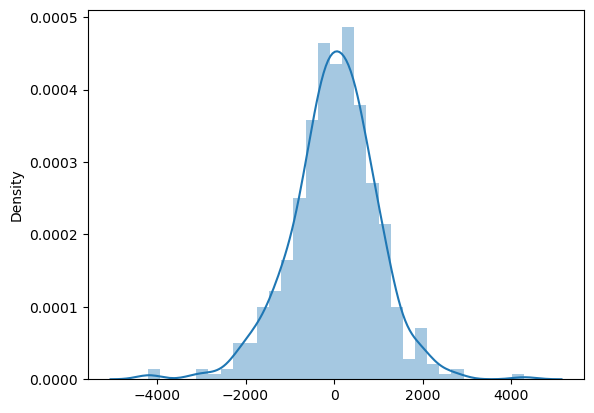

In [514]:
# Plotting the distribution plot to see if the error terms are normally distributed 

sns.distplot(resi)
plt.show()

Now we can see the error terms are normally distributed around the mean 

<Axes: >

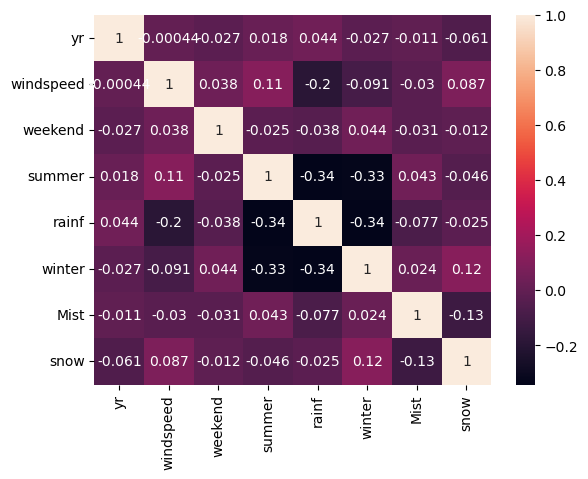

In [516]:
sns.heatmap(X_train1.corr(), annot=True)

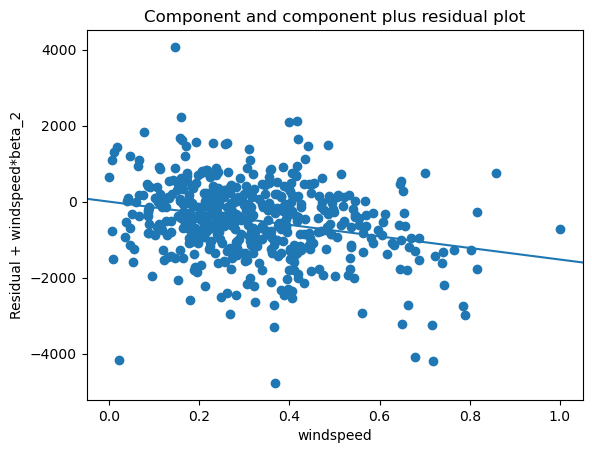

In [518]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot


sm.graphics.plot_ccpr(lm_7, 'windspeed')
plt.show()

In [520]:
# Predecting the Test data

min_mize = ['mnth', 'atemp', 'hum', 'windspeed',  'cnt' ]

df_test2[min_mize] = scaler.transform(df_test2[min_mize])

df_test2.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,weekend,summer,rainf,winter,Mist,snow
184,0,0.545455,1,0,0.769660,0.657364,0.084219,0.692706,0,0,1,0,1,0
535,1,0.454545,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0
299,0,0.818182,0,1,0.496145,0.837699,0.334206,0.303382,0,0,0,1,1,0
221,0,0.636364,0,1,0.795343,0.437098,0.339570,0.547400,0,0,1,0,0,0
152,0,0.454545,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0


In [524]:
y_test = df_test2.pop('cnt')
X_test2 = df_test2

In [558]:
x_test_sm2 = sm.add_constant(X_test2)
x_test_sm2

,const,yr,mnth,holiday,workingday,atemp,hum,windspeed,weekend,summer,rainf,winter,Mist,snow
184,1.0,0,0.545455,1,0,0.769660,0.657364,0.084219,0,0,1,0,1,0
535,1.0,1,0.454545,0,1,0.842587,0.610133,0.153728,0,1,0,0,0,0
299,1.0,0,0.818182,0,1,0.496145,0.837699,0.334206,0,0,0,1,1,0
221,1.0,0,0.636364,0,1,0.795343,0.437098,0.339570,0,0,1,0,0,0
152,1.0,0,0.454545,0,1,0.741471,0.314298,0.537414,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,1.000000,0,1,0.511907,0.756118,0.283397,0,0,0,1,0,0
127,1.0,0,0.363636,0,0,0.577380,0.650923,0.069510,1,1,0,0,0,0
640,1.0,1,0.818182,0,1,0.682653,0.817947,0.052115,0,0,0,1,1,0
72,1.0,0,0.181818,0,1,0.332005,0.512107,0.203418,0,0,0,0,0,0


In [560]:
x_test_sm2.columns

Index(['const', 'yr', 'mnth', 'holiday', 'workingday', 'atemp', 'hum',
       'windspeed', 'weekend', 'summer', 'rainf', 'winter', 'Mist', 'snow'],
      dtype='object')

In [ ]:
['const', 'yr', 'mnth', 'holiday', 'workingday', 'atemp', 'hum',
       'windspeed', 'weekend', 'summer', 'rainf', 'winter', 'Mist', 'snow']

'yr', 'windspeed', 'weekend', 'summer', 'rainf', 'winter', 'Mist',
       'snow'

In [562]:
x_test_sm2.drop(['holiday', 'mnth', 'workingday', 'atemp', 'hum'], axis=1, inplace=True)

In [564]:
x_test_sm2

,const,yr,windspeed,weekend,summer,rainf,winter,Mist,snow
184,1.0,0,0.084219,0,0,1,0,1,0
535,1.0,1,0.153728,0,1,0,0,0,0
299,1.0,0,0.334206,0,0,0,1,1,0
221,1.0,0,0.339570,0,0,1,0,0,0
152,1.0,0,0.537414,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
702,1.0,1,0.283397,0,0,0,1,0,0
127,1.0,0,0.069510,1,1,0,0,0,0
640,1.0,1,0.052115,0,0,0,1,1,0
72,1.0,0,0.203418,0,0,0,0,0,0


In [566]:
y_pred1 = lm_7.predict(x_test_sm2)

In [568]:
y_pred1

184    4371.628431
535    6647.499882
299    3209.455664
221    4719.797814
152    3916.549574
          ...     
702    6170.476614
127    4492.903775
640    5785.643182
72     2182.453758
653    6143.976428
Length: 220, dtype: float64

In [572]:
adjusted_r2 = round(1-(1-r2)*(X_test2.shape[0]-1)/(X_test2.shape[0]-X_test2.shape[1]-1),4)


Model Evaluation

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [ ]:
 # Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()